In [1]:
import pickle
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y = df['label'].values
y = y.reshape(42000)
X = df.drop('label', axis=1).values

print(X.shape)
print(y.shape)

(42000, 784)
(42000,)


In [4]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(33600, 784)
(33600,)
(8400, 784)
(8400,)


In [5]:
scaler = StandardScaler()
scaler.fit(train_x)

with open('scaler.save', 'wb') as f:
    pickle.dump(scaler, f)
    
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

Text(0,0.5,'Variance')

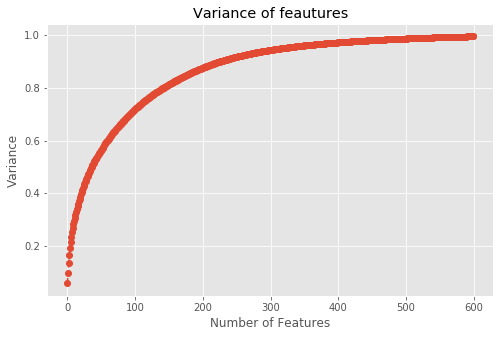

In [6]:
pca = PCA(n_components=600)
pca.fit(train_x)

fig = plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), '--o')
plt.title('Variance of feautures')
plt.xlabel('Number of Features')
plt.ylabel('Variance')

In [7]:
model = RandomForestClassifier(n_estimators=50)
model.fit(train_x, train_y)

pred = model.predict(test_x)
mse = mean_squared_error(test_y, pred)
acc = model.score(test_x, test_y)
print(f'Accuracy: {acc * 100} | MSE: {mse}')

Accuracy: 96.0 | MSE: 0.6980952380952381


In [8]:
cr = classification_report(test_y, pred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       827
           1       0.98      0.99      0.98       896
           2       0.94      0.95      0.95       837
           3       0.94      0.95      0.94       830
           4       0.97      0.97      0.97       827
           5       0.95      0.94      0.95       765
           6       0.97      0.97      0.97       825
           7       0.97      0.95      0.96       877
           8       0.95      0.96      0.95       847
           9       0.94      0.93      0.94       869

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



In [9]:
df = pd.read_csv('test.csv')
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X = df.values
X = scaler.transform(X)
print(X.shape)

(28000, 784)


In [14]:
pred = model.predict(X)
print(pred.shape)

(28000,)


In [15]:
my_dict = {'ImageId': [i for i in range(1, len(X) + 1)],
           'Label': pred}

sub_df = pd.DataFrame(my_dict)
sub_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [16]:
sub_df.to_csv('submission.csv', index=False)